
# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1-Is age associated to attending the appointment ?

2-What is the most vulnerable age for alcoholism 

3-Is education associated to the attendance of people to the appointment ?

4-Is alcohol addiction associated to people attending an appointment ?

5-Is the message arrival associated to the attendance of the people to the appointment?

<a id='wrangling'></a>
## Data Wrangling



In [3]:
import pandas as pd 
%matplotlib inline 
import matplotlib.pyplot as plt
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [28]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [29]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [30]:
##check if there missing value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#There is no missing value


In [31]:
##finding duplicate
sum(df.duplicated())

0

There is no dublicated

In [32]:
##check the type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

All the type is correct


### Research Question 1 (Is age associated to attending the appointment?)

In [33]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


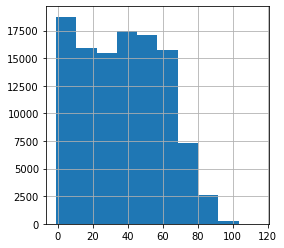

In [48]:
df['Age'].hist(figsize=(4,4));

In [35]:
##we will separate the age by median
Age_median = df['Age'].median()
old = df.loc[(df['Age'] >= Age_median) & (df['No-show'] == 'No')]
young = df.loc[(df['Age'] < Age_median) & (df['No-show'] == 'No')]

In [36]:
old.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


I will find Percentage of people old 

In [37]:
Total_old = df.loc[df['Age'] >= Age_median]

Per_old= old['Scholarship'].count() / Total_old['Scholarship'].count()
Per_old

0.8234810432046905

I will find Percentage of people young

In [38]:
Total_young = df.loc[df['Age'] < Age_median]

Per_young= young['Scholarship'].count() / Total_young['Scholarship'].count()
Per_young

0.7720211050857394

I will draw graphical It explains to us who are the most committed to the appointment

Text(0, 0.5, 'percent')

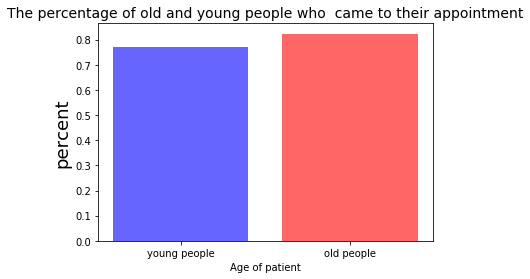

In [62]:
locations = [1,2]
heights = [Per_young ,Per_old]
labels = ['young people','old people']
plt.bar(locations , heights , tick_label=labels ,color=['blue','red'], alpha= 0.6);
plt.title('The percentage of old and young people who  came to their appointment', fontsize=14);
plt.xlabel('Age of patient')
plt.ylabel('percent' , fontsize=18)

### Research Question 2 (What is the most vulnerable age for alcoholism ?)

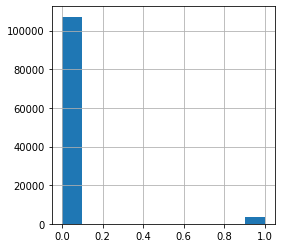

In [47]:
df['Alcoholism'].hist(figsize=(4,4));

In [45]:
# here I create a new variable put (Age , Alcoholism) columns
df1 = df[['Age','Alcoholism']]
df1.head()

,Age,Alcoholism
0,62,0
1,56,0
2,62,0
3,8,0
4,56,0


In [46]:
##I will anlysis the age from 25 untill 50
df1 = df1.loc[(df['Age'] >= 25) & (df['Age'] <= 50) & (df['Alcoholism'] == 1)]
df1.head()

,Age,Alcoholism
131,29,1
207,46,1
459,38,1
577,41,1
587,37,1


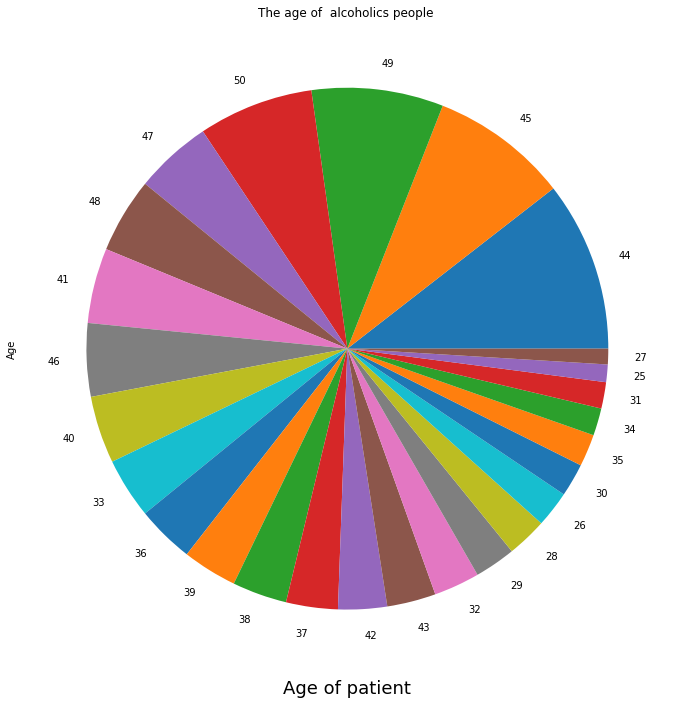

In [72]:
df1['Age'].value_counts().plot(kind='pie',figsize=(12,12),title='The age of  alcoholics people ');
plt.xlabel('Age of patient', fontsize=18);


### Research Question 3 (Is education associated to the attendance of people to the appointment?)


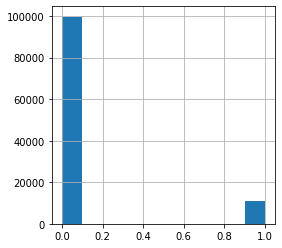

In [49]:
df['Scholarship'].hist(figsize=(4,4));

In [75]:
## I will put in value educated all people have Scholarship and their come to the appointment
educated = df.loc[(df['Scholarship'] == 1) & (df['No-show'] == 'No')] 
educated['Scholarship'].count()

8283

I will find Percentage of people have educated

In [76]:
Total_educated = df.loc[df['Scholarship'] == 1]

Per_educated= educated['Scholarship'].count() / Total_educated['Scholarship'].count()
Per_educated

0.7626369579228433

In [79]:
## I will put in value Not_educated all people  do not have Scholarship and their come to the appointment

Not_educated = df.loc[(df['Scholarship'] == 0) & (df['No-show'] == 'No')]
Not_educated.shape

(79925, 14)

I will find Percentage of people have no Not educated

In [81]:
Total_Not_educated = df.loc[df['Scholarship'] == 0]
Per_Not_educated = Not_educated['Scholarship'].count() / Total_Not_educated['Scholarship'].count()
Per_Not_educated

0.8019284409929164

I will draw graphical It explains to us who are the most committed to the appointment 

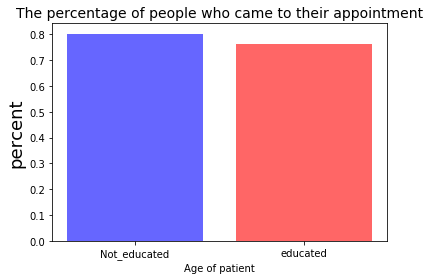

In [85]:
locations = [1,2]
heights = [Per_Not_educated ,Per_educated]
labels = ['Not_educated','educated']
plt.bar(locations , heights , tick_label=labels ,color=['blue','red'], alpha= 0.6);
plt.title('The percentage of people who came to their appointment', fontsize=14);
plt.xlabel('Age of patient')
plt.ylabel('percent' , fontsize=18);

### Research Question 4 ( Is alcohol addiction associated to people attending an appointment?)


In [20]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [86]:
##I will put in value Alcoholism all people have Alcoholism and their come to the appointment

Alcoholism = df.loc[(df['Alcoholism'] == 1) & (df['No-show'] == 'No')] 
Alcoholism['Alcoholism'].count()

2683

I will find percentage of people who have alcoholism

In [87]:
Total_Alcoholism = df.loc[df['Alcoholism'] == 1]

Per_Alcoholism= Alcoholism['Alcoholism'].count() / Total_Alcoholism['Alcoholism'].count()
Per_Alcoholism

0.7985119047619048

In [88]:
##I will put in value Not_Alcoholism all people do not have Alcoholism and their come to the appointment

Not_Alcoholism = df.loc[(df['Alcoholism'] == 0) & (df['No-show'] == 'No')] 
Not_Alcoholism['Alcoholism'].count()

85525

I will find percentage of people who do not have alcoholism

In [89]:
Total_Not_Alcoholism = df.loc[df['Alcoholism'] == 0]
Per_Not_Alcoholism= Not_Alcoholism['Alcoholism'].count() / Total_Not_Alcoholism['Alcoholism'].count()
Per_Not_Alcoholism

0.798053505276811

I will draw graphical It explains to us who are the most committed to the appointment

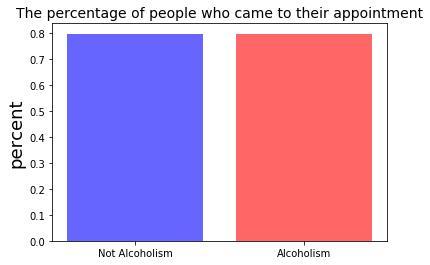

In [93]:
locations = [1,2]
heights = [Per_Not_Alcoholism ,Per_Alcoholism]
labels = ['Not Alcoholism','Alcoholism']
plt.bar(locations , heights , tick_label=labels ,color=['blue','red'], alpha= 0.6);
plt.title('The percentage of people who came to their appointment', fontsize=14);
plt.ylabel('percent' , fontsize=18);

### Research Question 5 ( Is the message arrival associated to the attendance of the people to the appointment?)


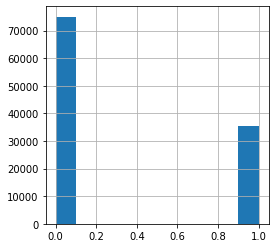

In [50]:
df['SMS_received'].hist(figsize=(4,4))

In [26]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [95]:
##I will put in value SMS_received all people have SMS_received and their come to the appointment

SMS_received = df.loc[(df['SMS_received'] == 1) & (df['No-show'] == 'No')] 
SMS_received['SMS_received'].count()

25698

I will find percentage of people who got a message

In [96]:
Total_SMS_received = df.loc[df['SMS_received'] == 1]

Per_SMS_received= SMS_received['SMS_received'].count() / Total_SMS_received['SMS_received'].count()
Per_SMS_received

0.7242545516036301

In [97]:
##I will put in value Not_SMS_received all people do not have SMS_received and their come to the appointment

Not_SMS_received = df.loc[(df['SMS_received'] == 0) & (df['No-show'] == 'No')] 
Not_SMS_received['SMS_received'].count()

62510

I will find  percentage of people who did not receive a message

In [98]:
Total_Not_SMS_received = df.loc[df['SMS_received'] == 0]

Per_Not_SMS_received= Not_SMS_received['SMS_received'].count() / Total_Not_SMS_received['SMS_received'].count()
Per_Not_SMS_received

0.8329668865347458

I will draw graphical It explains to us who are the most committed to the appointment

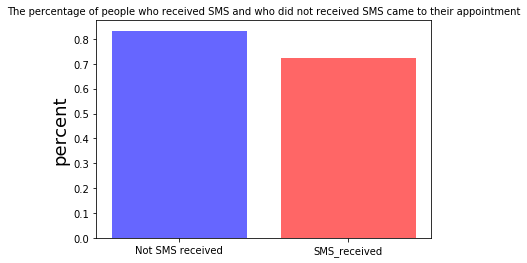

In [99]:
locations = [1,2]
heights = [Per_Not_SMS_received ,Per_SMS_received]
labels = ['Not SMS received','SMS_received']
plt.bar(locations , heights , tick_label=labels ,color=['blue','red'], alpha= 0.6);
plt.title('The percentage of people who received SMS and who did not received SMS came to their appointment', fontsize=10);
plt.ylabel('percent' , fontsize=18);

<a id='conclusions'></a>
## Conclusions



1- Older people are more committed to their appointments than young people

2- Most people alcoholics in the fifth decade

3- Not educated people are more committed to their appointments than educated people

4- People who haven't received a message are more committed to their appointments than people who've received a message

5- There is no correlation between alcoholism and the appearance of an appointment



limitation


The number of the Not educated is much higher than the educated